# ABSTRACT OF PROJECT

The goal of the project is to classify 10 different video categories out of a total of 50 categories available.

To achieve this goal We need to we have 3 scripts files:


*   data_preprocessing.py:
    
    This script is designed to handle video datasets, specifically for tasks that involve **splitting datasets into training and testing sets**, **loading video data**, and **retrieving video paths from specified categories**


*   utils.py:
    
    This script is part of a video classification project focused on classifying 10 different video categories out of a total of 50. The script includes functions for **extracting frames from video files**, **building a ConvLSTM-based neural network model for classification**, and **managing video category names**.

*   evaluation.py:
    
    This script provides utilities for evaluating and visualizing the performance of a video classification model. The functions included allow for **plotting training history**, **generating predictions**, **calculating and displaying a confusion matrix**, and **computing test accuracy**





In [ ]:
from google.colab import files


data_preprocessing = list(files.upload().values())[0]
utils = list(files.upload().values())[0]
evaluation = list(files.upload().values())[0]
open('data_preprocessing.py','wb').write(data_preprocessing)
open('utils.py','wb').write(utils)
open('evaluation.py', 'wb').write(evaluation)

Saving data_preprocessing.py to data_preprocessing.py


Saving utils.py to utils.py


Saving evaluation.py to evaluation.py


1914

In [1]:
from data_preprocessing import get_ten_top_categories
from data_preprocessing import get_dataset_filepaths
from data_preprocessing import load_data
from utils import build_model
from evaluation import plotting_acc_loss
from evaluation import get_confusion_matrix
from evaluation import get_acc_test
from evaluation import plot_confusion_matrix
from utils import get_categories_name

DATASET_PATH = '/content/UCF50'
START_INDEX = 0
END_INDEX = 5



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!unzip '/content/drive/MyDrive/UCF50.zip'

Epoch 1/10
47/47 [==============================] - 44s 548ms/step - loss: 1.9543 - accuracy: 0.3063 - val_loss: 1.6120 - val_accuracy: 0.4741
Epoch 2/10
47/47 [==============================] - 25s 530ms/step - loss: 1.4227 - accuracy: 0.5108 - val_loss: 1.5946 - val_accuracy: 0.4871
Epoch 3/10
47/47 [==============================] - 24s 518ms/step - loss: 1.1482 - accuracy: 0.6039 - val_loss: 1.3687 - val_accuracy: 0.5345
Epoch 4/10
47/47 [==============================] - 24s 503ms/step - loss: 0.9919 - accuracy: 0.6461 - val_loss: 1.2392 - val_accuracy: 0.5819
Epoch 5/10
47/47 [==============================] - 25s 529ms/step - loss: 0.9066 - accuracy: 0.6851 - val_loss: 1.0901 - val_accuracy: 0.5991
Epoch 6/10
47/47 [==============================] - 24s 518ms/step - loss: 0.8306 - accuracy: 0.6948 - val_loss: 1.0005 - val_accuracy: 0.6509
Epoch 7/10
47/47 [==============================] - 23s 496ms/step - loss: 0.7037 - accuracy: 0.7381 - val_loss: 0.9283 - val_accuracy: 0.6897

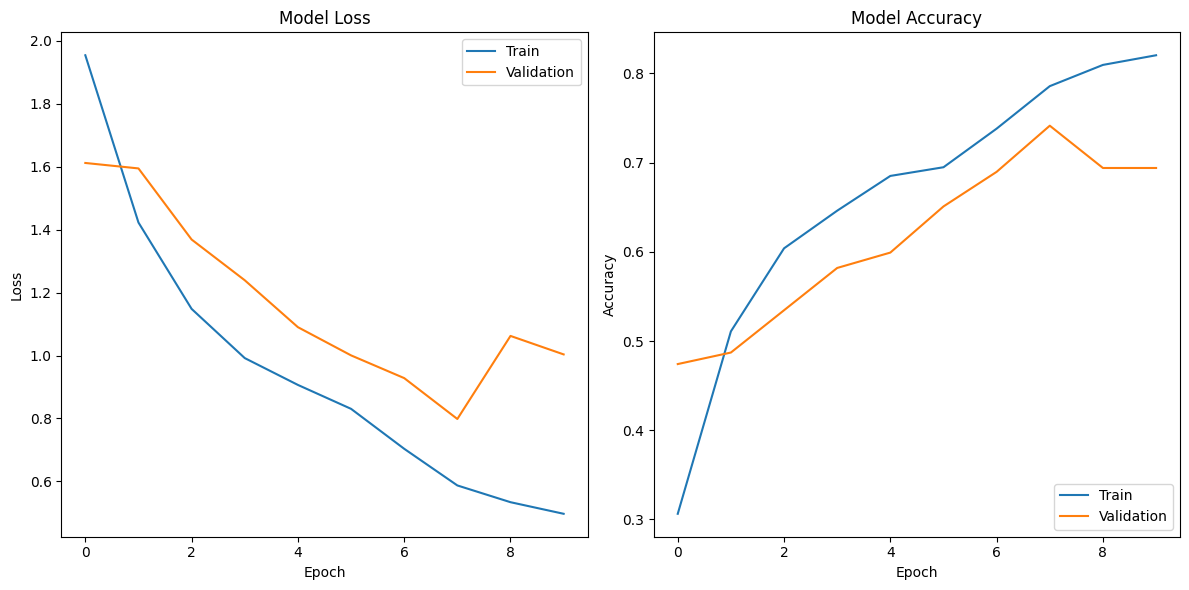

<Figure size 2000x1000 with 0 Axes>

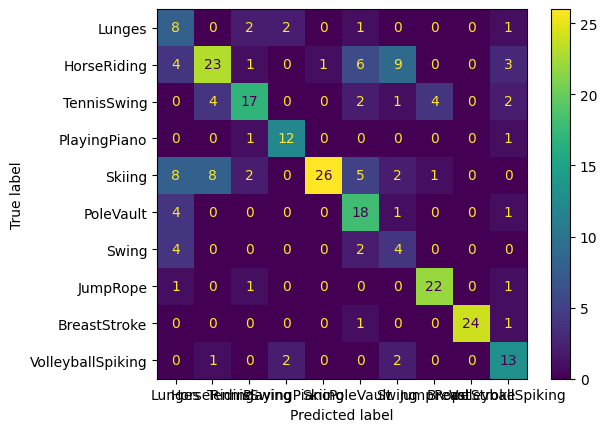

Accuracy on test data: 0.64
Epoch 1/10
41/41 [==============================] - 36s 562ms/step - loss: 2.0662 - accuracy: 0.2472 - val_loss: 1.8714 - val_accuracy: 0.3578
Epoch 2/10
41/41 [==============================] - 21s 518ms/step - loss: 1.7142 - accuracy: 0.3985 - val_loss: 1.7055 - val_accuracy: 0.4314
Epoch 3/10
41/41 [==============================] - 21s 514ms/step - loss: 1.4340 - accuracy: 0.5178 - val_loss: 1.6132 - val_accuracy: 0.4510
Epoch 4/10
41/41 [==============================] - 22s 536ms/step - loss: 1.2259 - accuracy: 0.5879 - val_loss: 1.4813 - val_accuracy: 0.5539
Epoch 5/10
41/41 [==============================] - 21s 514ms/step - loss: 1.0100 - accuracy: 0.6654 - val_loss: 1.5479 - val_accuracy: 0.5490
Epoch 6/10
41/41 [==============================] - 22s 528ms/step - loss: 0.8774 - accuracy: 0.6999 - val_loss: 1.3538 - val_accuracy: 0.5784
Epoch 7/10
41/41 [==============================] - 21s 508ms/step - loss: 0.7994 - accuracy: 0.7306 - val_loss: 1

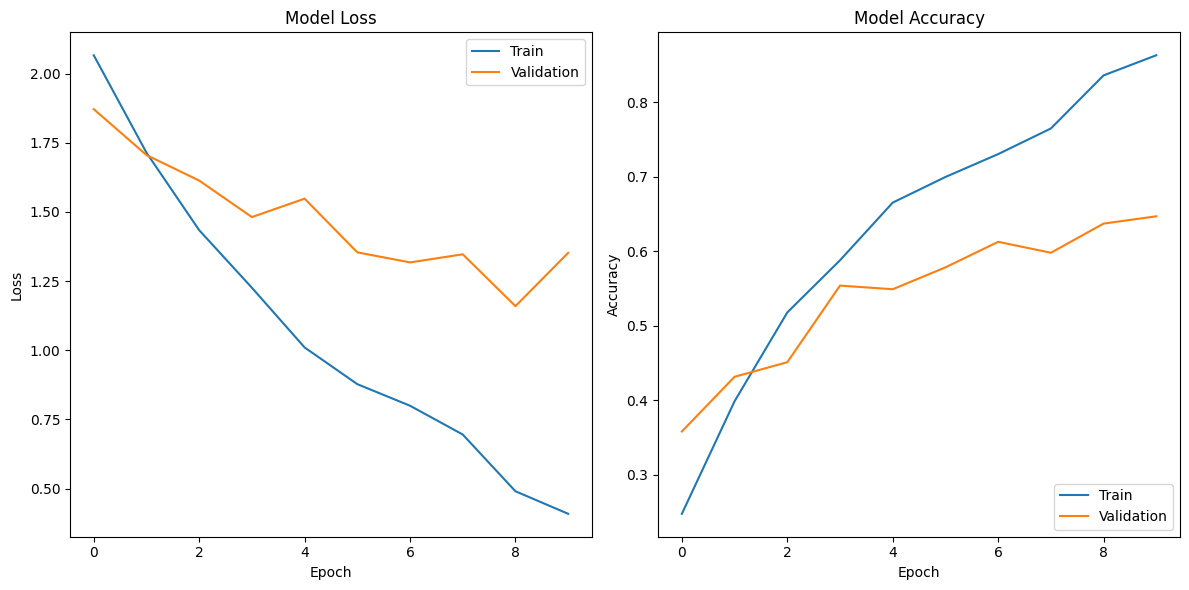

<Figure size 2000x1000 with 0 Axes>

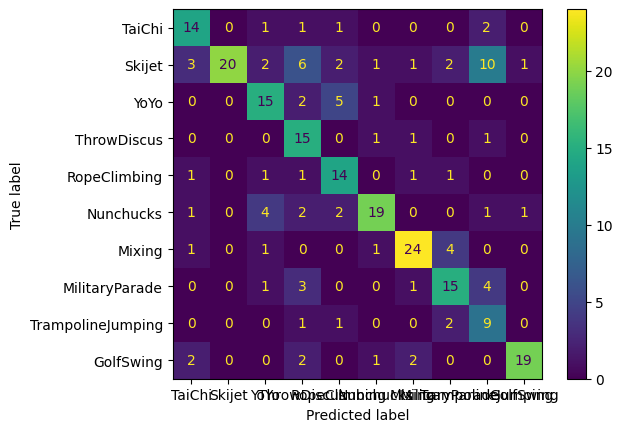

Accuracy on test data: 0.65
Epoch 1/10
41/41 [==============================] - 36s 556ms/step - loss: 2.0545 - accuracy: 0.2599 - val_loss: 1.7449 - val_accuracy: 0.3645
Epoch 2/10
41/41 [==============================] - 23s 552ms/step - loss: 1.6016 - accuracy: 0.4273 - val_loss: 1.4518 - val_accuracy: 0.5123
Epoch 3/10
41/41 [==============================] - 20s 497ms/step - loss: 1.2339 - accuracy: 0.5850 - val_loss: 1.4161 - val_accuracy: 0.5172
Epoch 4/10
41/41 [==============================] - 22s 546ms/step - loss: 1.0370 - accuracy: 0.6453 - val_loss: 1.3164 - val_accuracy: 0.5862
Epoch 5/10
41/41 [==============================] - 21s 516ms/step - loss: 0.8615 - accuracy: 0.7180 - val_loss: 1.0585 - val_accuracy: 0.6601
Epoch 6/10
41/41 [==============================] - 22s 547ms/step - loss: 0.7527 - accuracy: 0.7475 - val_loss: 0.9970 - val_accuracy: 0.6847
Epoch 7/10
41/41 [==============================] - 21s 502ms/step - loss: 0.6308 - accuracy: 0.7857 - val_loss: 1

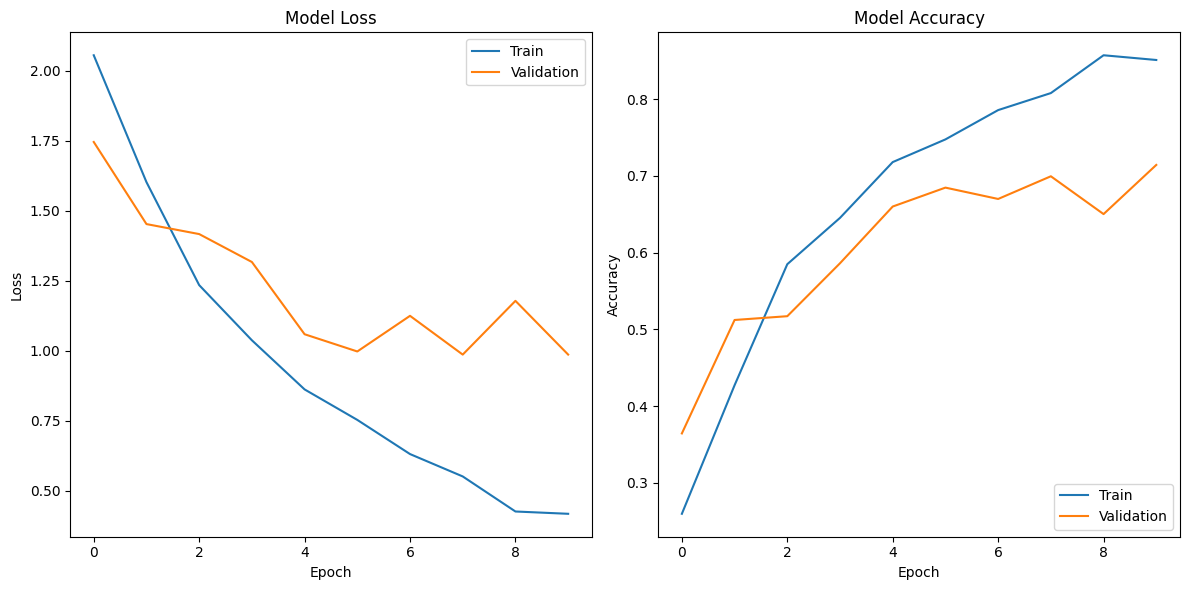

<Figure size 2000x1000 with 0 Axes>

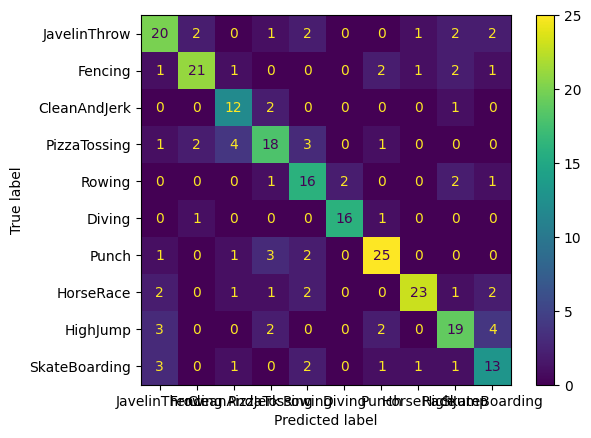

Accuracy on test data: 0.71
Epoch 1/10


In [ ]:
for i in range(START_INDEX, END_INDEX):
    # Retrieve video paths for the top 10 categories starting at the current index
    ten_top_categories_path = get_ten_top_categories(i, '/content/UCF50')

    # Split the retrieved video paths into training and testing sets, and shuffle them
    training_filepaths, testing_filepaths = get_dataset_filepaths(ten_top_categories_path)

    # Load frames and labels for the training dataset
    training_frames, training_labels = load_data(training_filepaths)

    # Load frames and labels for the testing dataset
    testing_frames, testing_labels = load_data(testing_filepaths)

    # Build the ConvLSTM-based model
    model = build_model()

    # Compile the model with Adam optimizer, sparse categorical cross-entropy loss, and accuracy metric
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Train the model on the training dataset
    history = model.fit(training_frames, training_labels, epochs=10, batch_size=20, validation_split=0.2)

    # Plot training and validation accuracy/loss curves
    plotting_acc_loss(history)

    # Compute the confusion matrix using the trained model on the testing dataset
    confusion_matrix = get_confusion_matrix(model, testing_frames, testing_labels)

    # Get category names corresponding to the current set of 10 categories
    categories_names = get_categories_name(i, DATASET_PATH)

    # Plot the confusion matrix with the associated category names
    plot_confusion_matrix(confusion_matrix, categories_names)

    # Calculate and print the accuracy on the testing dataset
    acc_test = get_acc_test(model, testing_frames, testing_labels)
    print(acc_test)